## Exploring information from student grades in 902, 10th, and 11th grade.

### 1. Loading data

In [31]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.linear_model import LogisticRegression

# # MLflow for experiment tracking
# import mlflow
# import mlflow.sklearn
# from mlflow.models import infer_signature
# from mlflow.tracking import MlflowClient


## 2. Exploring data.

In [2]:
base = Path("./cleaned_data")
paths = sorted(base.glob("*.parquet"))

In [3]:
dfs = {p.stem : pd.read_parquet(p) for p in paths}

In [4]:
noveno_2 = {}
decimo_1 = {}
decimo_2 = {}
decimo_3 = {}
decimo_4 = {}
once_1 = {}
once_2 = {}
once_3 = {}


for name, df in dfs.items():
    if name.startswith("10_1"):
        decimo_1[name] = df
    elif name.startswith("10_2"):    
        decimo_2[name] = df
    elif name.startswith("10_3"):    
        decimo_3[name] = df
    elif name.startswith("10_4"):
        decimo_4[name] = df
    elif name.startswith("11_1"):
        once_1[name] = df
    elif name.startswith("11_2"):
        once_2[name] = df
    elif name.startswith("11_3"):
        once_3[name] = df
    elif name.startswith("9_2"):
        noveno_2[name] = df

#### 2.1 Cleaning dataset

In [5]:
noveno_2['9_2_1'].columns

Index(['Competencia', 'CONOCER', 'HACER', 'SER', 'CONVIVIR', 'Subtotal NIVEL',
       'Nota P1', 'Rec P1', 'Nota P2', 'Rec P2', 'Nota P3', 'Rec P3',
       'Nota PF', 'Rec PF', 'OBS  1', 'OBS  2', 'OBS  3', 'OBS  4', 'OBS  5',
       'LLEGADA TARDE', 'INASISTENCIA JUSTIFICADA',
       'INASISTENCIA INJUSTIFICADA', 'PERMISO', 'RETARDO'],
      dtype='object')

Columns to drop:

* `Competencia`
* `OBS n` where n = 1, 2, 3, 4, 5
* `Nota P3`,
* `Rec P3`,
* `Rec PF`

In [6]:
test_df = noveno_2['9_2_1'].drop(columns=['Competencia', 'OBS  1', 'OBS  2', 'OBS  3', 'OBS  4', 'OBS  5']).iloc[:, :13]
test_df = test_df.replace({"None", pd.NA}, inplace=False).reset_index().rename(columns={'index' : 'ESTUDIANTE'})

/tmp/ipykernel_1662/3796006468.py:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  test_df = test_df.replace({"None", pd.NA}, inplace=False).reset_index().rename(columns={'index' : 'ESTUDIANTE'})


In [7]:
before_removing = test_df.copy()
before_removing = before_removing.reset_index().rename(columns={'index' : 'ID'})
before_removing.head()

,ID,ESTUDIANTE,CONOCER,HACER,SER,CONVIVIR,Subtotal NIVEL,Nota P1,Rec P1,Nota P2,Rec P2,Nota P3,Rec P3,Nota PF,Rec PF
0,0,ABAUNZA VASQUEZ SEBASTIAN,None,None,None,None,None,None,None,None,None,NaN,NaN,None,NaN
1,1,ALVARADO BLANCO STIVEN ALEXANDER,A,A,S,S,S,S,None,S,None,NaN,NaN,S,NaN
2,2,ALVAREZ BEDOYA SARA JULIETH,S,B,A,A,A,A,None,S,None,NaN,NaN,S,NaN
3,3,ARANGO GUZMAN ALISON STEFANY,B,B,A,B,B,B,None,A,None,NaN,NaN,A,NaN
4,4,ARISTIZABAL QUIROZ OSCAR GABRIEL,B,B,A,B,B,B,None,B,None,NaN,NaN,B,NaN


In [8]:
test_df = test_df.dropna(how="all", subset=test_df.columns[1:13], inplace=False)

In [9]:
test_df

,ESTUDIANTE,CONOCER,HACER,SER,CONVIVIR,Subtotal NIVEL,Nota P1,Rec P1,Nota P2,Rec P2,Nota P3,Rec P3,Nota PF,Rec PF
1,ALVARADO BLANCO STIVEN ALEXANDER,A,A,S,S,S,S,None,S,None,NaN,NaN,S,NaN
2,ALVAREZ BEDOYA SARA JULIETH,S,B,A,A,A,A,None,S,None,NaN,NaN,S,NaN
3,ARANGO GUZMAN ALISON STEFANY,B,B,A,B,B,B,None,A,None,NaN,NaN,A,NaN
4,ARISTIZABAL QUIROZ OSCAR GABRIEL,B,B,A,B,B,B,None,B,None,NaN,NaN,B,NaN
5,ARZUZAR LANCHERO NICOLL ALEJANDRA,A,A,A,A,A,A,None,A,None,NaN,NaN,A,NaN
6,BALLEN PANTOJA NICOLAS SANTIAGO,A,A,B,B,A,A,None,B,None,NaN,NaN,A,NaN
7,BARRIOS ESPITIA JUAN MANUEL,A,A,A,A,A,A,None,S,None,NaN,NaN,S,NaN
8,BERNAL SALINAS DIEGO ANDRES,A,B,A,B,A,A,None,None,None,NaN,NaN,A,NaN
9,CANO CARDENAS MARIA JOSE,B,B,A,B,B,B,None,B,None,NaN,NaN,B,NaN
10,CANONIGO ZAPATA KARELYN DAHIANA,A,A,A,A,A,A,None,S,None,NaN,NaN,S,NaN


In [10]:
test_df = test_df.reset_index().rename(columns={'index' : 'ID'})

In [11]:
merge_test_df = noveno_2['9_2_1'].iloc[:, 19:].reset_index().rename(columns={'index' : 'ESTUDIANTE'}).reset_index().rename(columns={'index' : 'ID'})

In [21]:
merged_9_2_df = test_df.merge(
    merge_test_df,
    on=['ID', 'ESTUDIANTE'],
    how='left'
)

merged_9_2_df.head()

,ID,ESTUDIANTE,CONOCER,HACER,SER,CONVIVIR,Subtotal NIVEL,Nota P1,Rec P1,Nota P2,Rec P2,Nota P3,Rec P3,Nota PF,Rec PF,LLEGADA TARDE,INASISTENCIA JUSTIFICADA,INASISTENCIA INJUSTIFICADA,PERMISO,RETARDO
0,1,ALVARADO BLANCO STIVEN ALEXANDER,A,A,S,S,S,S,None,S,None,NaN,NaN,S,NaN,0,0,0,0,0
1,2,ALVAREZ BEDOYA SARA JULIETH,S,B,A,A,A,A,None,S,None,NaN,NaN,S,NaN,0,1,0,4,0
2,3,ARANGO GUZMAN ALISON STEFANY,B,B,A,B,B,B,None,A,None,NaN,NaN,A,NaN,0,1,3,1,0
3,4,ARISTIZABAL QUIROZ OSCAR GABRIEL,B,B,A,B,B,B,None,B,None,NaN,NaN,B,NaN,0,0,1,0,0
4,5,ARZUZAR LANCHERO NICOLL ALEJANDRA,A,A,A,A,A,A,None,A,None,NaN,NaN,A,NaN,0,0,4,0,0


In [13]:
merged_9_2_df.columns

Index(['ID', 'ESTUDIANTE', 'CONOCER', 'HACER', 'SER', 'CONVIVIR',
       'Subtotal NIVEL', 'Nota P1', 'Rec P1', 'Nota P2', 'Rec P2', 'Nota P3',
       'Rec P3', 'Nota PF', 'Rec PF', 'LLEGADA TARDE',
       'INASISTENCIA JUSTIFICADA', 'INASISTENCIA INJUSTIFICADA', 'PERMISO',
       'RETARDO'],
      dtype='object')

In [14]:
dfs["11_1_2"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, ACOSTA GUTIERREZ VERONICA SOFIA to VICTORIA RAMOS SARA SOFIA
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Competencia                 0 non-null      float64
 1   CONOCER                     40 non-null     object 
 2   HACER                       40 non-null     object 
 3   SER                         40 non-null     object 
 4   CONVIVIR                    40 non-null     object 
 5   Subtotal NIVEL              40 non-null     object 
 6   Nota P1                     41 non-null     object 
 7   Rec P1                      2 non-null      object 
 8   Nota P2                     40 non-null     object 
 9   Rec P2                      1 non-null      object 
 10  Nota P3                     0 non-null      float64
 11  Rec P3                      0 non-null      float64
 12  Nota PF                     41 non-null     ob

In [15]:
dfs["11_1_2"].isna().sum().sort_values(ascending=False)[:11].keys()

Index(['Competencia', 'OBS  4', 'OBS  5', 'OBS  2', 'Rec PF', 'OBS  1',
       'Nota P3', 'Rec P3', 'OBS  3', 'Rec P2', 'Rec P1'],
      dtype='object')

In [16]:
cols_to_drop = ['Competencia', 'OBS  4', 'OBS  5', 'OBS  2', 'Rec PF', 'OBS  1',
       'Nota P3', 'Rec P3', 'OBS  3']

In [17]:
def remove_unregistered_students(raw_df:pd.DataFrame) -> pd.DataFrame:
    """
        Cleans the raw dataframe by removing unnecessary columns and rows that do not contain grading information along with students that are not listed in the courses.
        Args:
            raw_df (pd.DataFrame): The raw dataframe to be cleaned.
        Returns:
            pd.DataFrame: The cleaned dataframe.    
    """
    # Dropping unnecessary columns.
    
    # Unnecessary columns are those that do not relate to grading.
    cols_to_drop = ['Competencia', 'OBS  1', 'OBS  2', 'OBS  3', 'OBS  4', 'OBS  5']
    
    # Keeping only the first 13 columns that relate to grading.
    cleaned_df = raw_df.drop(columns=cols_to_drop).iloc[:, :13]
    
    # Replacing "None" and pd.NA values with NaN, then dropping rows that are completely empty.
    cleaned_df = cleaned_df.replace({"None", pd.NA}, inplace=False).reset_index().rename(columns={'index' : 'ESTUDIANTE'})

    # Resetting index and dropping completely empty rows, then creating an auxiliar foreign key.
    cleaned_df = cleaned_df.reset_index().rename(columns={'index' : 'ID'})
    cleaned_df = cleaned_df.dropna(how="all", subset=cleaned_df.columns[2:13], inplace=False).dropna(subset=cleaned_df.columns[9], how="all")
    
    # Merge to non-grading relative columns.
    to_merge = raw_df.iloc[:, 19:].reset_index().rename(columns={'index' : 'ESTUDIANTE'}).reset_index().rename(columns={'index' : 'ID'})
    merged = cleaned_df.merge(
        to_merge,
        on=[
            'ID', 
            'ESTUDIANTE'
        ],
        how='inner'
    )
    
    # Columns where missing values must be binarized.
    cols = ['Rec P1', 'Rec P2', 'Rec P3', 'Rec PF']
    merged[cols] = merged[cols].notna().astype("Int64")

    return merged
        

### Analysing student cumulated grades.

In [73]:
to_analyse = {
    i: remove_unregistered_students(dfs[k])['Nota PF'].value_counts().sort_values(ascending=False)
    for i, k in enumerate(dfs)
    if i % 2 == 0    
}

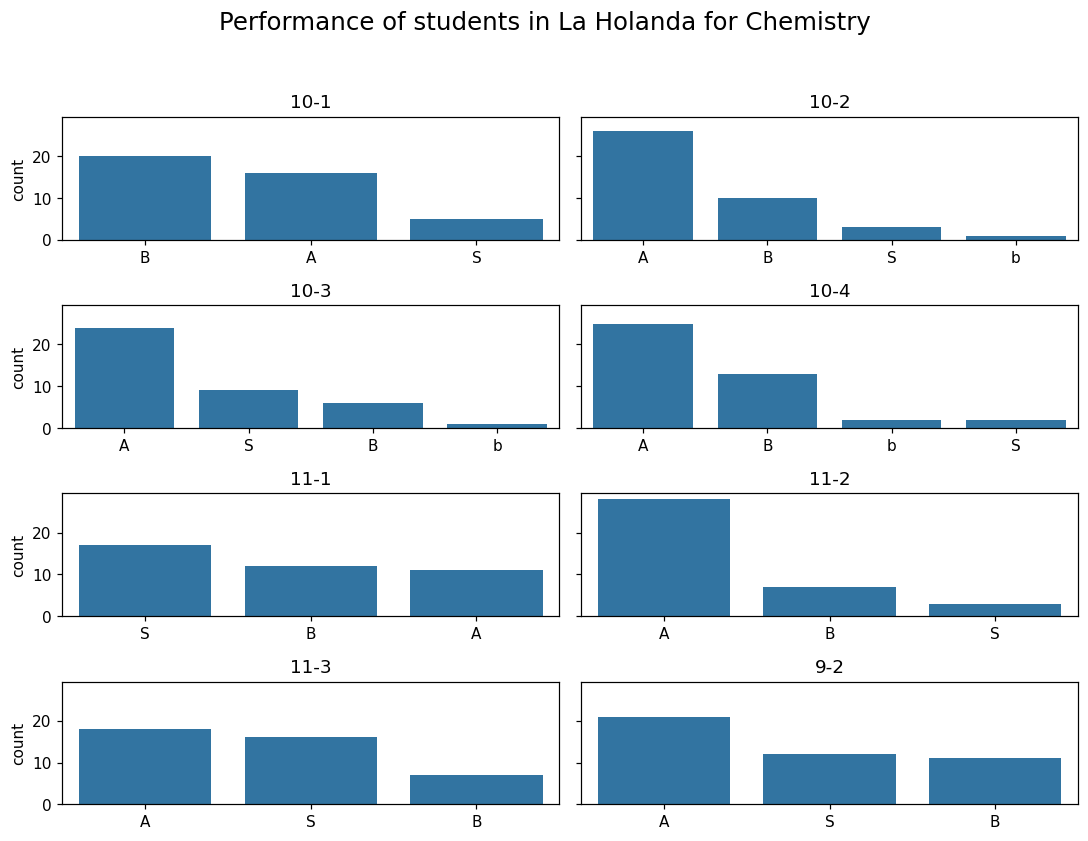

In [74]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8), dpi=110, sharex=False, sharey=True)

# Set a single title for the whole figure
fig.suptitle("Performance of students in La Holanda for Chemistry", fontsize=16)

# Plot the first 6 series from to_analyse into the 3x2 grid
for ax, series in zip(axes.flatten(), to_analyse.values()):
	sns.barplot(x=series.index, y=series.values, ax=ax)
	ax.set_xlabel("")
	ax.set_ylabel("count")
 
axes.flatten()[0].set_title("10-1")
axes.flatten()[1].set_title("10-2")
axes.flatten()[2].set_title("10-3")
axes.flatten()[3].set_title("10-4")
axes.flatten()[4].set_title("11-1")
axes.flatten()[5].set_title("11-2")
axes.flatten()[6].set_title("11-3")
axes.flatten()[7].set_title("9-2")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
